In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

## Prepare dataset

In [3]:
train_df = pd.read_csv('T3SE_clustered_embeddings_Nterm_train.csv')
X_train_raw = train_df.drop(columns=['ID', 'Sequence_part', 'Label'])
Y_train = train_df['Label']

test_df = pd.read_csv('T3SE_clustered_embeddings_Nterm_test.csv')
X_test_raw = test_df.drop(columns=['ID', 'Sequence_part', 'Label'])
Y_test = test_df['Label']

### Normalize

In [4]:
scaler = MinMaxScaler().fit(X_train_raw.values)
X_train = scaler.transform(X_train_raw.values)
X_test = scaler.transform(X_test_raw.values)

## Logistic regression

In [32]:
model = LogisticRegression(max_iter=400).fit(X_train,Y_train)

## Test on test dataset

In [33]:
Y_predicted_label = model.predict(X_test)

In [34]:
Y_predicted_probabilities = model.predict_proba(X_test)[::,1]

In [35]:
acc = metrics.accuracy_score(Y_test, Y_predicted_label)
f1 = metrics.f1_score(Y_test, Y_predicted_label, average='binary', zero_division=0)
auroc = metrics.roc_auc_score(Y_test, Y_predicted_probabilities)
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_predicted_probabilities)
specificity = metrics.recall_score(Y_test, Y_predicted_label, pos_label=0)
sensitivity = metrics.recall_score(Y_test, Y_predicted_label)
auprc = metrics.auc(recall, precision)
print(f"Test metrics: \n Accuracy: {float(acc):>6f}, F1 score: {float(f1):>6f}, AUROC: {float(auroc):>6f}, AUPRC: {float(auprc):>6f}, Specificity: {float(specificity):>6f}, Sensitivity: {float(sensitivity):>6f}\n")        

Test metrics: 
 Accuracy: 0.938992, F1 score: 0.596491, AUROC: 0.914678, AUPRC: 0.669942, Specificity: 0.992636, Sensitivity: 0.453333



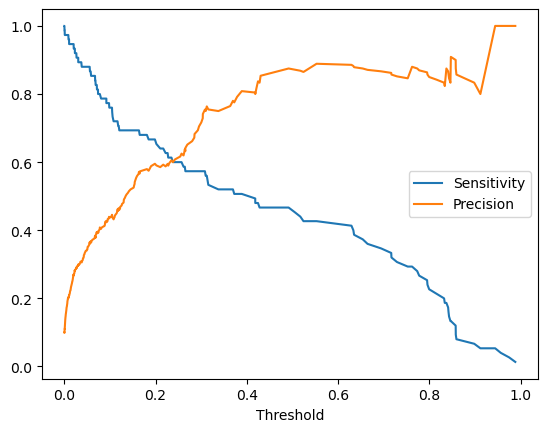

In [52]:
plt.plot(thresholds, recall[:-1], label='Sensitivity')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.legend()
plt.show()

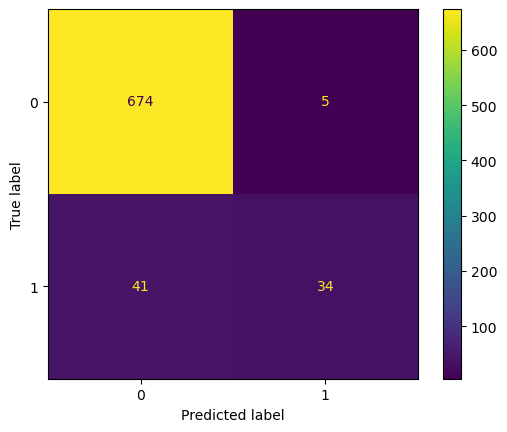

In [36]:
cm = metrics.confusion_matrix(Y_test, Y_predicted_label)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()